In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # p2.Xlarge only has one GPU

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

### show original image

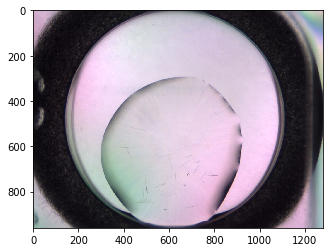

In [4]:
img = Image.open('sample.jpg')
img = np.asarray(img)
plt.imshow(img)

In [5]:
img.shape

(960, 1280, 3)

### pixel value 0 - 255, dtype=uint8

In [6]:
img

array([[[197, 162, 194],
        [201, 166, 198],
        [205, 170, 202],
        ...,
        [212, 192, 194],
        [213, 193, 195],
        [215, 195, 197]],

       [[198, 163, 195],
        [200, 165, 197],
        [202, 167, 199],
        ...,
        [213, 193, 195],
        [213, 193, 195],
        [213, 193, 195]],

       [[199, 164, 196],
        [199, 164, 196],
        [199, 164, 196],
        ...,
        [213, 194, 196],
        [211, 192, 194],
        [210, 190, 192]],

       ...,

       [[143, 174, 159],
        [142, 173, 158],
        [142, 173, 158],
        ...,
        [175, 194, 201],
        [176, 195, 202],
        [177, 196, 203]],

       [[148, 179, 164],
        [147, 178, 163],
        [146, 177, 162],
        ...,
        [175, 194, 201],
        [176, 195, 202],
        [177, 196, 203]],

       [[147, 178, 163],
        [146, 177, 162],
        [144, 175, 160],
        ...,
        [175, 194, 201],
        [176, 195, 202],
        [177, 196, 203]]

### image resized

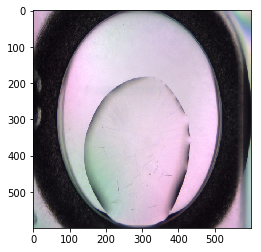

In [7]:
img = Image.open('sample.jpg').resize((599, 599))
img = np.asarray(img)
plt.imshow(img)

In [8]:
img.shape

(599, 599, 3)

In [9]:
img

array([[[201, 166, 198],
        [207, 172, 204],
        [204, 169, 201],
        ...,
        [217, 198, 200],
        [214, 194, 196],
        [213, 193, 195]],

       [[199, 164, 196],
        [200, 165, 197],
        [205, 170, 202],
        ...,
        [212, 193, 195],
        [213, 194, 196],
        [211, 192, 194]],

       [[201, 166, 198],
        [199, 164, 196],
        [207, 172, 204],
        ...,
        [208, 192, 192],
        [213, 195, 195],
        [210, 192, 192]],

       ...,

       [[139, 169, 157],
        [140, 170, 158],
        [142, 173, 158],
        ...,
        [170, 190, 197],
        [172, 192, 199],
        [175, 194, 201]],

       [[142, 173, 158],
        [142, 173, 158],
        [144, 175, 160],
        ...,
        [169, 189, 196],
        [173, 192, 199],
        [176, 195, 202]],

       [[146, 177, 162],
        [143, 174, 159],
        [145, 176, 160],
        ...,
        [170, 189, 196],
        [173, 192, 199],
        [176, 195, 202]]

### use marco preprocess_input

In [27]:
from marco import marco, preprocess_input
img = Image.open('sample.jpg')
img = np.expand_dims(img, axis=0)
img = preprocess_input(img.astype('float32'))
img

array([[[[0.54509807, 0.27058828, 0.52156866],
         [0.5764706 , 0.30196083, 0.5529412 ],
         [0.60784316, 0.33333337, 0.58431375],
         ...,
         [0.6627451 , 0.5058824 , 0.52156866],
         [0.67058825, 0.5137255 , 0.5294118 ],
         [0.6862745 , 0.5294118 , 0.54509807]],

        [[0.5529412 , 0.27843142, 0.5294118 ],
         [0.5686275 , 0.2941177 , 0.54509807],
         [0.58431375, 0.30980396, 0.56078434],
         ...,
         [0.67058825, 0.5137255 , 0.5294118 ],
         [0.67058825, 0.5137255 , 0.5294118 ],
         [0.67058825, 0.5137255 , 0.5294118 ]],

        [[0.56078434, 0.28627455, 0.5372549 ],
         [0.56078434, 0.28627455, 0.5372549 ],
         [0.56078434, 0.28627455, 0.5372549 ],
         ...,
         [0.67058825, 0.52156866, 0.5372549 ],
         [0.654902  , 0.5058824 , 0.52156866],
         [0.64705884, 0.4901961 , 0.5058824 ]],

        ...,

        [[0.12156868, 0.36470592, 0.24705887],
         [0.11372554, 0.35686278, 0.23921573]

### use keras preprocess_input, result is identical to marco preprocess_input, but it does not have center crop

In [28]:
from keras_applications import imagenet_utils as utils

img = Image.open('sample.jpg')
img = np.asarray(img)
img = utils.preprocess_input(img.astype('float32'), data_format='channels_last', mode='tf')
img

array([[[0.54509807, 0.27058828, 0.52156866],
        [0.5764706 , 0.30196083, 0.5529412 ],
        [0.60784316, 0.33333337, 0.58431375],
        ...,
        [0.6627451 , 0.5058824 , 0.52156866],
        [0.67058825, 0.5137255 , 0.5294118 ],
        [0.6862745 , 0.5294118 , 0.54509807]],

       [[0.5529412 , 0.27843142, 0.5294118 ],
        [0.5686275 , 0.2941177 , 0.54509807],
        [0.58431375, 0.30980396, 0.56078434],
        ...,
        [0.67058825, 0.5137255 , 0.5294118 ],
        [0.67058825, 0.5137255 , 0.5294118 ],
        [0.67058825, 0.5137255 , 0.5294118 ]],

       [[0.56078434, 0.28627455, 0.5372549 ],
        [0.56078434, 0.28627455, 0.5372549 ],
        [0.56078434, 0.28627455, 0.5372549 ],
        ...,
        [0.67058825, 0.52156866, 0.5372549 ],
        [0.654902  , 0.5058824 , 0.52156866],
        [0.64705884, 0.4901961 , 0.5058824 ]],

       ...,

       [[0.12156868, 0.36470592, 0.24705887],
        [0.11372554, 0.35686278, 0.23921573],
        [0.11372554, 0

In [10]:
from marco import marco, preprocess_input
model = marco(input_shape=(599, 599, 3))

## predict
with marco preprocess_input, convert pixel to -1 to 1

In [15]:
image = 'sample.jpg'

img = Image.open(image).resize((599, 599))
arr = np.expand_dims(img, axis=0)
y_pred = model.predict(preprocess_input(arr.astype('float32')))
y_pred = y_pred.ravel()
print("{} class={} prob={}".format(image, np.argmax(y_pred), np.max(y_pred)))

sample.jpg class=1 prob=0.9280320405960083


In [16]:
print(y_pred)

[0.02187204 0.92803204 0.02351023 0.02658572]


### use slim inception preprocessing to normalize, center crop (0.875) and resize image to 599x599
this is more close to what orginal marco preprocessing is

In [29]:
import tensorflow as tf
from image_utils import preprocess_image

img = Image.open('sample.jpg')
img = np.asarray(img)
img = tf.convert_to_tensor(img)
img = preprocess_image(img, 599, 599)

with tf.Session() as sess:
    img = img.eval()   # convert tf tensor back to np array

In [30]:
img.shape

(599, 599, 3)

In [32]:
img

array([[[-0.49019605, -0.55294114, -0.46666664],
        [-0.57136405, -0.63410914, -0.53419095],
        [-0.57851315, -0.6412583 , -0.53929746],
        ...,
        [ 0.4431373 ,  0.43223047,  0.5041667 ],
        [ 0.4530226 ,  0.43733633,  0.52361095],
        [ 0.4676882 ,  0.45200193,  0.5539628 ]],

       [[-0.47450978, -0.51372546, -0.47297782],
        [-0.582263  , -0.6214787 , -0.57055414],
        [-0.5545093 , -0.59372497, -0.5466461 ],
        ...,
        [ 0.4443699 ,  0.43652678,  0.49927187],
        [ 0.4561782 ,  0.4428259 ,  0.52209866],
        [ 0.46727717,  0.4515909 ,  0.5378655 ]],

       [[-0.4997545 , -0.53265893, -0.5202199 ],
        [-0.59711933, -0.6355132 , -0.6039412 ],
        [-0.55895734, -0.5935055 , -0.5753375 ],
        ...,
        [ 0.44866633,  0.4408232 ,  0.5035683 ],
        [ 0.4655336 ,  0.4556483 ,  0.52452004],
        [ 0.46584475,  0.45015848,  0.5364331 ]],

       ...,

       [[ 0.40526962,  0.33658087,  0.42772675],
        [ 0

### image color is off, because pixel value is -1 to 1, instead of o - 255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


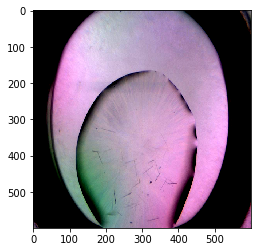

In [45]:
plt.imshow(img)

In [31]:
arr = np.expand_dims(img, axis=0)
y_pred = model.predict(arr)      
y_pred = y_pred.ravel()
print("{} class={} prob={}".format(image, np.argmax(y_pred), np.max(y_pred)))
print(y_pred)

sample.jpg class=1 prob=0.9267643094062805
[0.02109778 0.9267643  0.02557935 0.02655847]
